# Clustering Analysis of Hearthstone Cards - visualizations
This section uses dimensionality reduction techniques such as Principal Component Analysis (PCA) and T-distributed Stochastic Neighbor Embedding (TSNE) to attempt to visualize where each card is relative to one another.

----

## Introduction
**Dimensionality reduction techniques used**
- **Principal Component Analysis (PCA)**  
PCA is a dimensionality deruction technique that decomposes a multi-dimensional matrix of features into a number of arbitary axes which explain the largest portion of the samples' variance. For visualizations, PCA is generally used to decompose the features into 2 dimensions and the samples are then plotted using this 2-dimensional coordinate system.  
- **T-distributed Stochastic Neighbor Embedding (TSNE)**  
On the other hand, TSNE uses probability distributions to express similarities between two points. It does so in such a way that if two points, A and B, were similar, given that point A is selected, point B then has a high probability of being chosen as a neighbor. TSNE then finds the positions of the points in a 2-dimensional space that minimizes the differences between the probability distributions among the pairs.

----

### Importing packages

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Loading data
The processed data has already been generated and saved in the notebook `hs-package-kmeans.ipynb`. Reading the CSV file `cards-decks.csv`

In [2]:
# reading the csv file, using the first column as index
cards_features = pd.read_csv("./cards-decks.csv", index_col=0)
cards_features.head()

,137,1690,2414,3527,3992,4592,4965,5269,5327,5358,...,325935,325937,326209,330402,331034,334031,335601,336843,345826,346203
name,,,,,,,,,,,,,,,,,,,,,
Oasis Snapjaw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shadow Word: Death,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Silent Knight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unlicensed Apothecary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shadow Madness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# saving the dataframe as numpy array
cards_features_array = np.array(cards_features)

## Performing PCA (2 dimensions)
Reducing the dimensions of the data from 1296 dimensions to 2 most important arbitary dimensions.

In [4]:
pca = PCA(n_components=2)
cards_features_array_pca = pca.fit_transform(cards_features_array)

print("Variance explained by the top 2 axes: %0.3f, %0.3f" % tuple(pca.explained_variance_ratio_))

Variance explained by the top 2 axes: 0.071, 0.054


The two axes calcualted by PCA are able to explain 7.1% andd 5.4% of the variace.

In [5]:
cards_features_array_pca_df = pd.DataFrame(cards_features_array_pca, columns = ['component 1', 'component 2'], index=cards_features.index)
cards_features_array_pca_df.head()

,component 1,component 2
name,,
Oasis Snapjaw,-0.874302,-0.594301
Shadow Word: Death,0.549872,2.103249
Silent Knight,-0.652880,-0.541119
Unlicensed Apothecary,-0.829449,-0.517643
Shadow Madness,-0.797092,-0.321555


## Performing TSNE (2 dimensions)
Using TSNE to reduce the dimension of the dataset to 2 dimensions.

In [6]:
cards_features_array_tsne = TSNE(n_components=2).fit_transform(cards_features_array)

In [7]:
cards_features_array_tsne_df = pd.DataFrame(cards_features_array_tsne, columns = ['component 1', 'component 2'], index=cards_features.index)
cards_features_array_tsne_df.head()

,component 1,component 2
name,,
Oasis Snapjaw,20.191666,-4.531873
Shadow Word: Death,-30.378878,-18.770338
Silent Knight,-12.954645,-22.623373
Unlicensed Apothecary,7.531914,25.663813
Shadow Madness,-5.231334,-7.401094


## Plotting the PCA/TSNE data

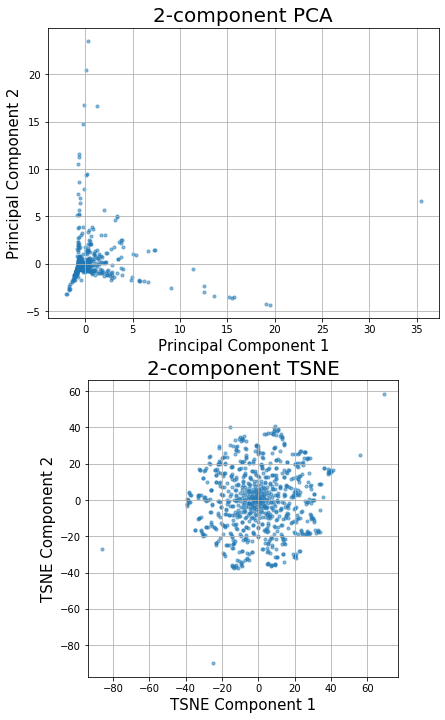

In [8]:
# plotting a simple scatterplot without color or partitining.
fig = plt.figure(figsize=(7, 12))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlabel('Principal Component 1', fontsize=15)
ax1.set_ylabel('Principal Component 2', fontsize=15)
ax1.set_title('2-component PCA', fontsize=20)
ax1.scatter(cards_features_array_pca_df['component 1'],
            cards_features_array_pca_df['component 2'],
            s = 10,
            alpha = 0.5)
ax1.grid()
ax1.set(aspect='equal')

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlabel('TSNE Component 1', fontsize=15)
ax2.set_ylabel('TSNE Component 2', fontsize=15)
ax2.set_title('2-component TSNE', fontsize=20)
ax2.scatter(cards_features_array_tsne_df['component 1'],
            cards_features_array_tsne_df['component 2'],
            s = 10,
            alpha = 0.5)
ax2.grid()
ax2.set(aspect='equal')

plt.savefig("cluster-nopartition.jpg");

### Discussion
Both plots show one major cluster. Given this, some partitioning is needed to further make sense of the cards distribution.

## Plotting the PCA/TSNE data again
Now with color coding for each card's class (or neutral).
The colors used are:
- Warrior (red)
- Shaman (blue)
- Rogue (black)
- Paladin (yellow)
- Hunter (green)
- Druid (brown)
- Warlock (purple)
- Mage (light blue)
- Priest (white)
- Neutral (grey)

First, the cards' associated classes have to be added to the dataframe.

### Cards details from JSON
JSON file contains the names and IDs of all the cards. This JSON file will be used to obtain the list of all card IDs.

In [9]:
# reading the JSON file
refs = json.load(open("./history-of-hearthstone/refs.json"))
card_data = pd.DataFrame.from_records(refs)

# dropping cards without dbfId
card_data = card_data[~card_data['dbfId'].isna()]

# dropping cards that are not collectible
card_data = card_data[~card_data['collectible'].isna()]

Merging the card_data to the existing dataframes for PCA and TSNE

In [10]:
cards_features_array_tsne_df = cards_features_array_tsne_df.merge(card_data.loc[:,["name", "cardClass"]], on="name", how='left', validate='one_to_one')
cards_features_array_pca_df = cards_features_array_pca_df.merge(card_data.loc[:,["name", "cardClass"]], on="name", how='left', validate='one_to_one')

### Plotting
Plotting scatterplots with color and partitining.

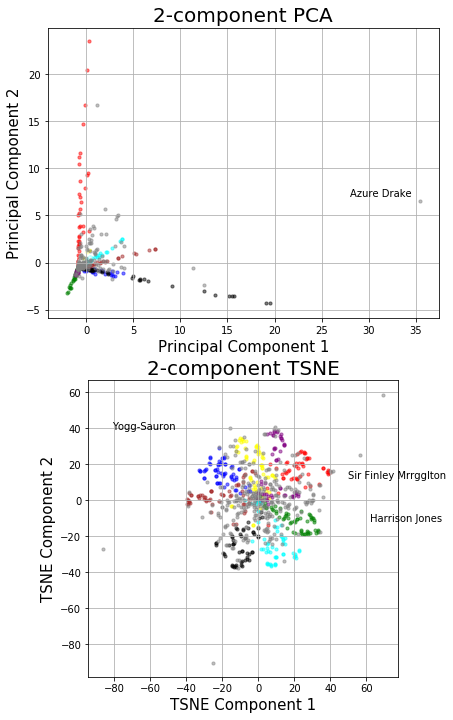

In [11]:
# defining the classes and their colors
classes = ["WARRIOR",
           "SHAMAN",
           "ROGUE",
           "PALADIN",
           "HUNTER",
           "DRUID",
           "WARLOCK",
           "MAGE",
           "PRIEST",
           "NEUTRAL"]

colors = ["red",
          "blue",
          "black",
          "yellow",
          "green",
          "brown",
          "purple",
          "cyan",
          "white",
          "grey"]

# plotting

fig = plt.figure(figsize=(7, 12))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlabel('Principal Component 1', fontsize=15)
ax1.set_ylabel('Principal Component 2', fontsize=15)
ax1.set_title('2-component PCA', fontsize=20)
ax1.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlabel('TSNE Component 1', fontsize=15)
ax2.set_ylabel('TSNE Component 2', fontsize=15)
ax2.set_title('2-component TSNE', fontsize=20)
ax2.grid()

for hsclass, color in zip(classes,colors):
    indices_toplot_pca = cards_features_array_pca_df['cardClass'] == hsclass
    indices_toplot_tsne = cards_features_array_tsne_df['cardClass'] == hsclass
    ax1.scatter(cards_features_array_pca_df.loc[indices_toplot_pca, 'component 1'],
                cards_features_array_pca_df.loc[indices_toplot_pca, 'component 2'],
                c = color,
                s = 10,
                alpha=0.5)
    ax2.scatter(cards_features_array_tsne_df.loc[indices_toplot_tsne, 'component 1'],
                cards_features_array_tsne_df.loc[indices_toplot_tsne, 'component 2'],
                c = color,
                s = 10,
                alpha=0.5)
    
ax1.set(aspect='equal')
ax2.set(aspect='equal')
ax1.annotate('Azure Drake', xy=(28,7))
ax2.annotate('Yogg-Sauron', xy=(-81,39))
ax2.annotate('Harrison Jones', xy=(62,-12))
ax2.annotate('Sir Finley Mrrgglton', xy=(50,12))
ax2.annotate('Leeroy Jenkins', xy=(-20,85))
    

plt.savefig("cluster-partition.jpg");

### Discussion
**PCA**  
PCA shows us different "streaks" of different colors. Each card occupies different streaks in the scatter plot. This is an expected behavior since cards from different cards cannot be in the same deck. As such, using decks as features makes class cards very distinct from each other. We also see neutral cards in grey being distributed into streaks too. These cards are likely the neutral cards that synergize well with the archetypes from a particular class. Interestingly, **Azure Drake** is an outlier. This is possibly due to the fact that **Azure Drake** can be included in almost every deck. As such, it is more likely to have a non-zero under most of the features and hence is perceived to be far away from other cards in terms of euclidean distance.  

**TSNE**  
Instead of streaks, TSNE position each class to occupy a range of angle from the centoid, like a pizza slice. Notable outliers are **Harrison Jones** and **Sir Finley Mrrgglton**. These two cards are usually included in warrior decks and we can see that the nearest neighbors are red points, which are warrior cards.  
Similarly, **Leeroy Jenkins** is positioned in the rogue's region (black) and **Yogg Sauron** is under druid's region (brown). These cards are likely to be far away from their main archetypes and classes because despite being commonly included in their respective class' decks, they are also found in other classes' decks, making them slightly different from the class cards. Yogg Sauron has mage variants. Leeroy Jenkins and Sir Finley Mrrgglton are commonly included in other aggressive decks too. Harrison Jones is a good tech card against any deck that utilizes weapons.  
It is also worth looking at warlock cards' distribution in TSNE. Warlock cards are found near neutral cards. This is reflective of the nature of warlock class cards and deck archetypes where players usually include a large portion of powerful neutral cards instead of class cards.